In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

missing_values_table(train)

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [6]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
train.Embarked.dropna(inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test.Embarked.dropna(inplace=True)
print()

In [8]:
train = train.replace(['male', 'female'], [0, 1])
test = test.replace(['male', 'female'], [0, 1])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [9]:
train['Cherbourg'] = train.Embarked == 'C'
train['Queenstown'] = train.Embarked == 'Q'
train['Southampton'] = train.Embarked == 'S'
train = train.drop('Embarked', axis=1)
train = train.replace([True, False], [1, 0])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cherbourg,Queenstown,Southampton
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


In [10]:
test['Cherbourg'] = test.Embarked == 'C'
test['Queenstown'] = test.Embarked == 'Q'
test['Southampton'] = test.Embarked == 'S'
test = test.drop('Embarked', axis=1)
test = test.replace([True, False], [1, 0])

In [11]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cherbourg,Queenstown,Southampton
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


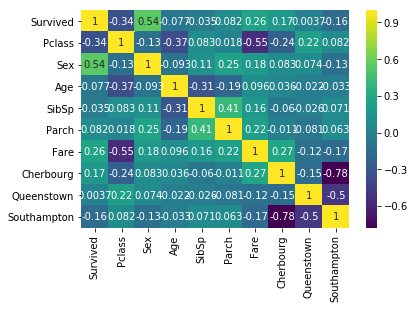

In [12]:
sns.heatmap(train.corr(), cmap='viridis', annot=True)
plt.show()

In [13]:
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
for col in cols:
    train.loc[:, col] = normalize(train[col])
    test.loc[:, col] = normalize(test[col])
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cherbourg,Queenstown,Southampton
0,0,1.0,0,0.271174,0.125,0.0,0.014151,0,0,1
1,1,0.0,1,0.472229,0.125,0.0,0.139136,1,0,0
2,1,1.0,1,0.321438,0.000,0.0,0.015469,0,0,1
3,1,0.0,1,0.434531,0.125,0.0,0.103644,0,0,1
4,0,1.0,0,0.434531,0.000,0.0,0.015713,0,0,1


In [14]:
train.Age.fillna(train.Age.mean(), inplace=True)
test.Age.fillna(test.Age.mean(), inplace=True)
print()

In [15]:
y = train.Survived
X = train.drop('Survived', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25)

In [16]:
from sklearn.metrics import accuracy_score, f1_score

In [17]:
from sklearn.tree import DecisionTreeClassifier
tc_1 = DecisionTreeClassifier()
tc_1.fit(X_train, y_train)
tc_1_preds = tc_1.predict(X_val)

In [18]:
print(accuracy_score(y_val, tc_1_preds), f1_score(y_val, tc_1_preds))

0.820627802690583 0.761904761904762


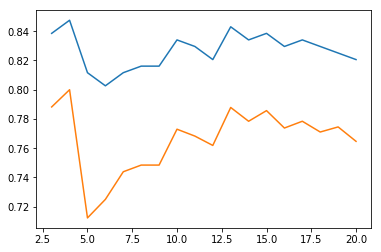

In [19]:
graph_as = []
graph_f = []
for i in range(3, 21):
    tc_2 = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    tc_2.fit(X_train, y_train)
    tc_2_preds = tc_2.predict(X_val)
    graph_as.append(accuracy_score(y_val, tc_2_preds))
    graph_f.append(f1_score(y_val, tc_2_preds))
    
plt.plot(list(range(3, 21)), graph_as)
plt.plot(list(range(3, 21)), graph_f)
plt.show()

In [20]:
tc_2 = DecisionTreeClassifier(criterion='entropy', max_depth=6)
tc_2.fit(X_train, y_train)
tc_2_preds = tc_2.predict(X_val)
print(accuracy_score(y_val, tc_2_preds), f1_score(y_val, tc_2_preds))

0.8071748878923767 0.7295597484276729


In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf_1 = RandomForestClassifier(criterion='entropy')
rf_1.fit(X_train, y_train)
rf_1_preds = rf_1.predict(X_val)
print(accuracy_score(y_val, rf_1_preds), f1_score(y_val, rf_1_preds))

0.8475336322869955 0.7901234567901234


/home/vano/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [23]:
import xgboost as xgb

/home/vano/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/vano/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [24]:
xgb_1 = xgb.XGBClassifier()
xgb_1.fit(X_train, y_train)
xgb_1_preds = xgb_1.predict(X_val)
print(accuracy_score(y_val, xgb_1_preds), f1_score(y_val, xgb_1_preds))

0.8654708520179372 0.8214285714285714


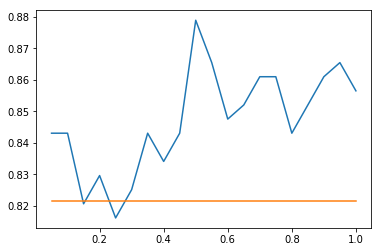

In [32]:
graph = []
acc = []
f1 = []
beta = np.linspace(0.05, 1, 20)
for b in beta:
    xgb_2 = xgb.XGBClassifier(learning_rate=b, n_estimators=7)
    xgb_2.fit(X_train, y_train)
    xgb_2_preds = xgb_2.predict(X_val)
    acc.append(accuracy_score(y_val, xgb_2_preds))
    f1.append(f1_score(y_val, xgb_1_preds))

plt.plot(beta, acc)
plt.plot(beta, f1)

In [41]:
xgb_2 = xgb.XGBClassifier(learning_rate=0.49, n_estimators=9)
xgb_2.fit(X_train, y_train)
xgb_2_preds = xgb_2.predict(X_val)
print(accuracy_score(y_val, xgb_2_preds))

0.874439461883408


In [42]:
preds = xgb_2.predict(test.drop('PassengerId', axis=1))

In [56]:
df = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived' : preds}, index=None)
df.set_index('PassengerId', inplace=True)
df.to_csv(r'/home/vano/file.csv')
df

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1
